# Cleaning Data 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/large_dataset.csv')

In [11]:
# List of columns
pre_fight_columns = ['r_age',
'r_height',
'r_weight',
'r_reach',
'r_wins_total',
'r_losses_total',
'r_stance',

'r_SLpM_total',
'r_SApM_total',
'r_sig_str_acc_total',
'r_str_def_total',

'r_td_avg',
'r_td_acc_total',
'r_td_def_total',

'r_sub_avg',
'b_age',
'b_height',
'b_weight',
'b_reach',
'b_wins_total',
'b_losses_total',
'b_stance',

'b_SLpM_total',
'b_SApM_total',
'b_sig_str_acc_total',
'b_str_def_total',

'b_td_avg',
'b_td_acc_total',
'b_td_def_total',

'b_sub_avg',

'weight_class',
'is_title_bout',
'total_rounds',
'gender',

'age_diff',
'height_diff',
'reach_diff',
'wins_total_diff',
'losses_total_diff',

'SLpM_total_diff',
'SApM_total_diff',
'sig_str_acc_total_diff',
'str_def_total_diff',

'td_avg_diff',
'td_acc_total_diff',
'td_def_total_diff',

'sub_avg_diff',
    

'winner'
]


df_pre_fight = df[pre_fight_columns]
df_pre_fight.to_csv("../data/ufc_pre_fight_data2.csv", index=False)

In [12]:

df_pre_fight= df_pre_fight.dropna()
df_pre_fight = df_pre_fight[df_pre_fight['gender'] != 'Women']


## Data Visualizations

### Win Rate (Red vs Blue)

/var/folders/pf/bltyd1c16ms154t9zv6zvp6m0000gn/T/ipykernel_1668/1247651222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Corner', y='WinRate', data=win_df, palette=['red', 'blue'])


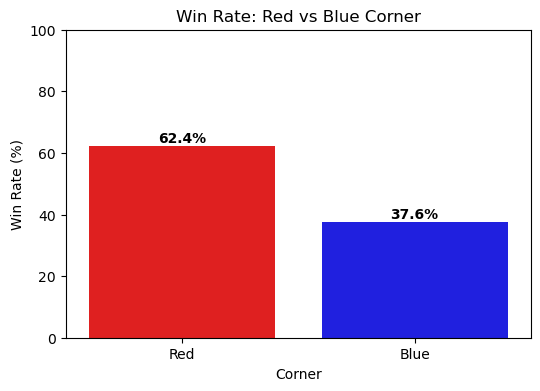

In [13]:
win_counts = df_pre_fight['winner'].value_counts()
win_percent = 100 * win_counts / win_counts.sum()

win_df = win_percent.reset_index()
win_df.columns = ['Corner', 'WinRate']

plt.figure(figsize=(6,4))
sns.barplot(x='Corner', y='WinRate', data=win_df, palette=['red', 'blue'])
plt.title('Win Rate: Red vs Blue Corner')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)

for index, row in win_df.iterrows():
    plt.text(index, row.WinRate + 1, f"{row.WinRate:.1f}%", ha='center', fontweight='bold')

plt.show()

### Reach Difference Histplot

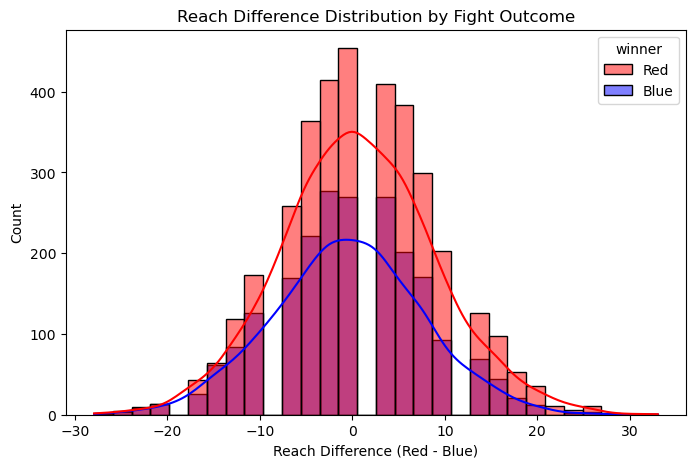

In [14]:
palette = {
    'Red': 'red',
    'Blue': 'blue'
}

plt.figure(figsize=(8,5))
sns.histplot(
    data=df_pre_fight,
    x='reach_diff',
    hue='winner',
    bins=30,
    kde=True,
    palette=palette
)

plt.title('Reach Difference Distribution by Fight Outcome')
plt.xlabel('Reach Difference (Red - Blue)')
plt.ylabel('Count')
plt.show()

This chart is consistent with the previous one. Overall, the red corner shows a higher win rate however, when the reach difference is very small, the blue corner gains an advantage. This outcome was expected and aligns with the assumption that physical reach becomes less influential when fighters are closely matched.

### Title vs Non-Title

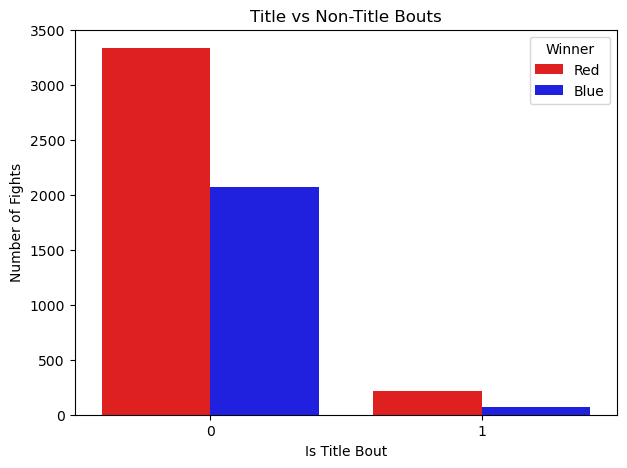

In [15]:
palette = {
    'Red': 'red',
    'Blue': 'blue'
}

plt.figure(figsize=(7,5))
sns.countplot(
    data=df_pre_fight,
    x='is_title_bout',
    hue='winner',
    palette=palette
)

plt.title('Title vs Non-Title Bouts')
plt.xlabel('Is Title Bout')
plt.ylabel('Number of Fights')
plt.legend(title='Winner')
plt.show()

As expected, the number of non-title fights is higher. For title fights, the chart shows that the red corner has a clear advantage however, it is important to remember that, overall, the red corner generally has a higher win rate.

### Corelation Matrices

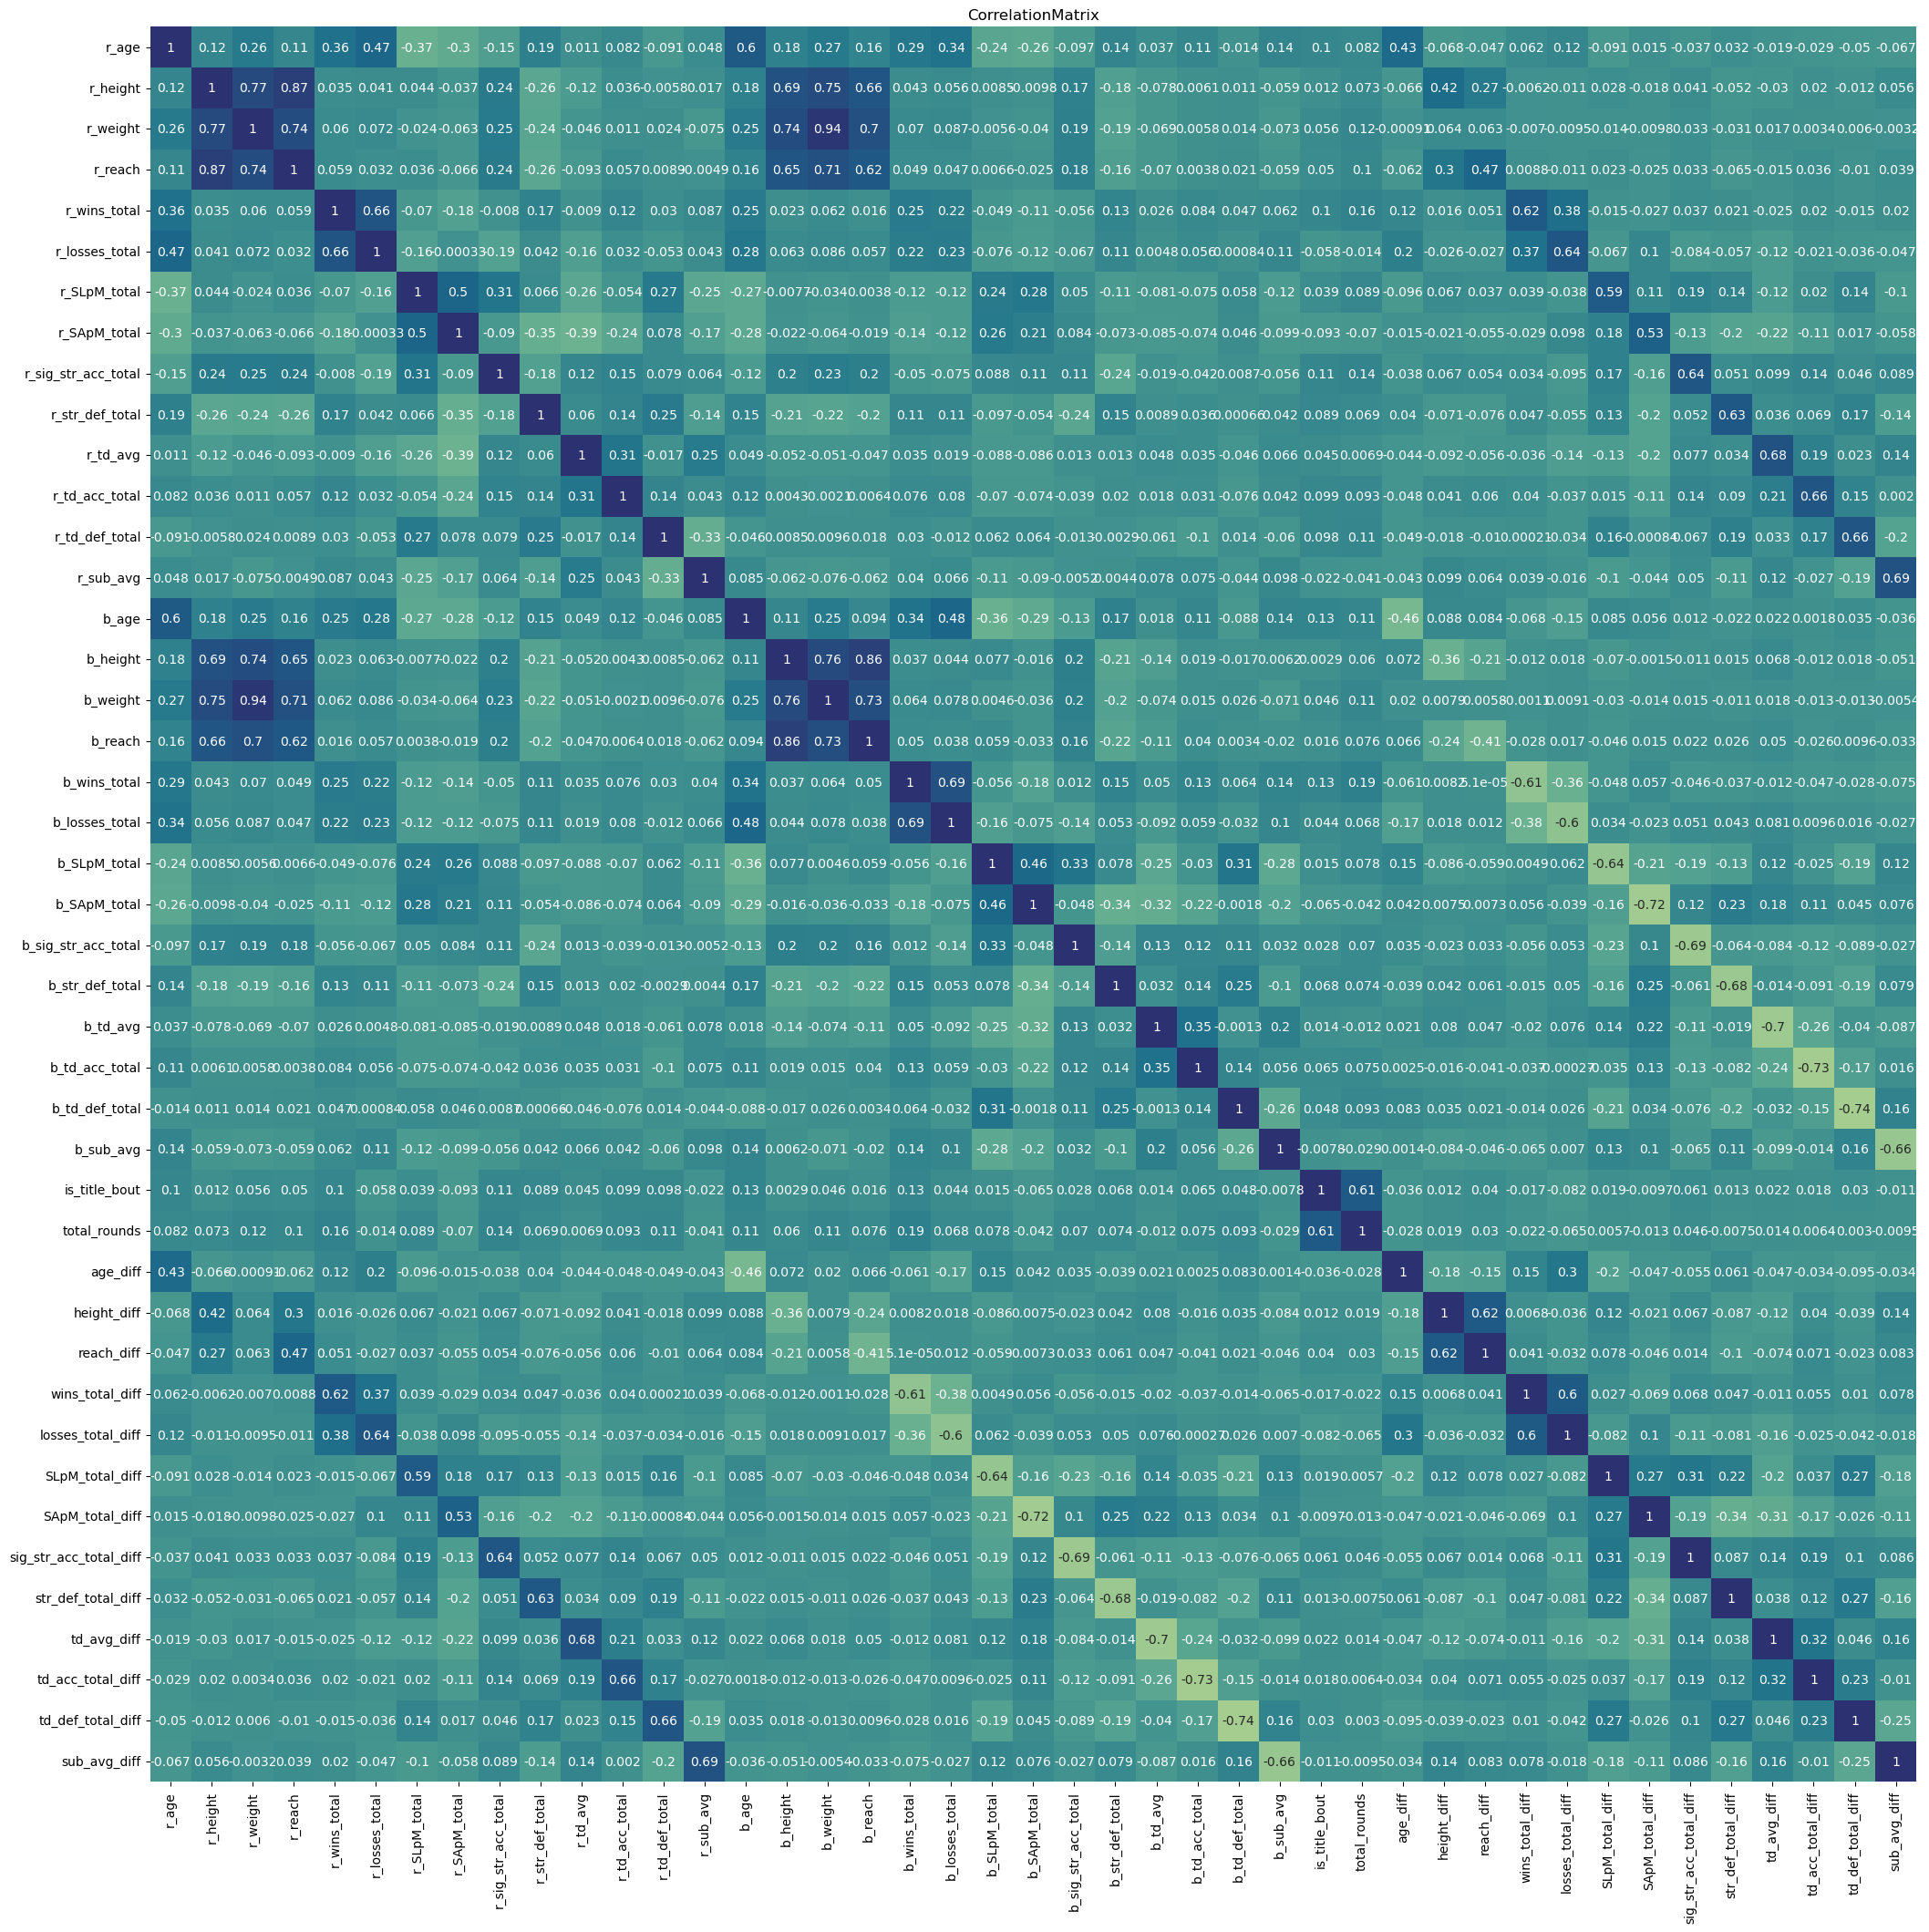

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(data=df_pre_fight.corr(numeric_only=True), cbar=False, annot=True, cmap='crest')
plt.title('CorrelationMatrix')
plt.show()

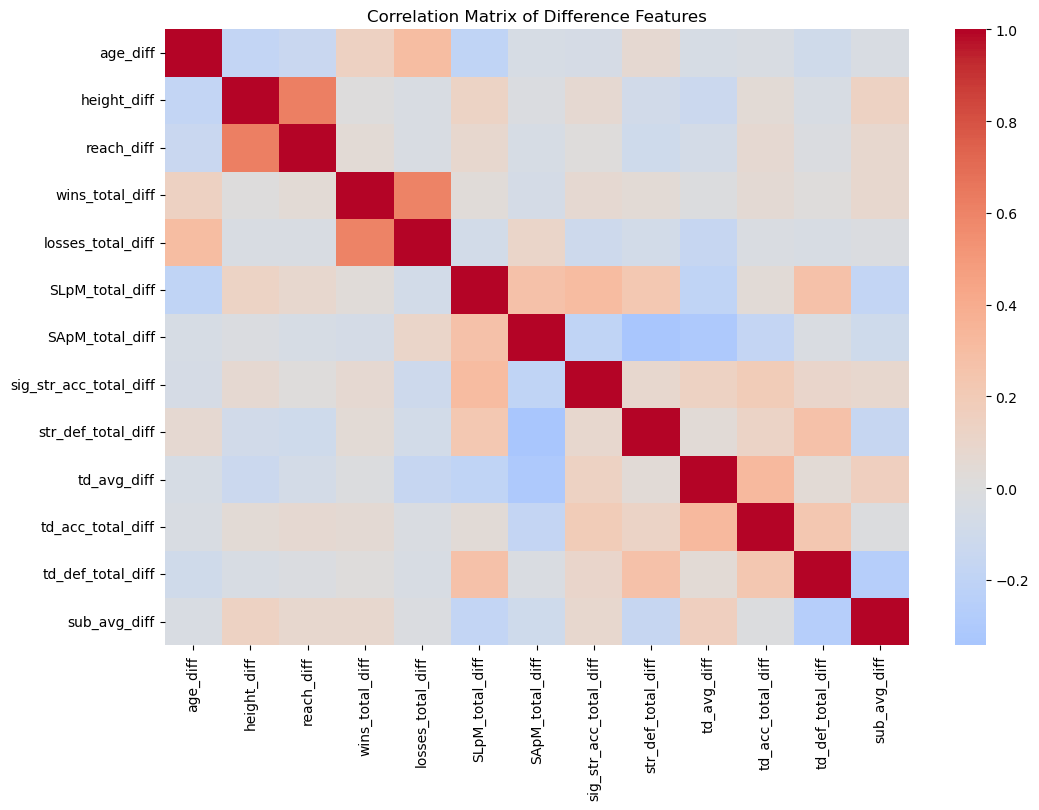

In [17]:
diff_cols = [col for col in df_pre_fight.columns if col.endswith('_diff')]

plt.figure(figsize=(12,8))
sns.heatmap(
    df_pre_fight[diff_cols].corr(),
    cmap='coolwarm',
    center=0
)
plt.title('Correlation Matrix of Difference Features')
plt.show()

No meaningful correlations were observed, indicating that all measured values are normal.

## Preparing Data for Creating a Model

In [18]:
# Changing winner to 1/0 (1-Red won)
df_pre_fight['winner'] = df_pre_fight['winner'].map({'Red': 1, 'Blue': 0})

# Removing 'gender' and 'total_rounds' column
df_pre_fight = df_pre_fight.drop(columns=['gender'])
df_pre_fight = df_pre_fight.drop(columns=['total_rounds'])

# One-hot encoding for weight_class, r_stance, b_stance
df_pre_fight = pd.get_dummies(df_pre_fight, columns=['weight_class', 'r_stance', 'b_stance'], drop_first=True)

df_pre_fight.to_csv("../data/ufc_pre_fight_men_ready2.csv", index=False)